<a href="https://colab.research.google.com/github/pavithra64/Fraud-detection/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [58]:
df=pd.read_csv("/content/Fraud.csv")

In [59]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [60]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
138111,11,TRANSFER,1023642.86,C1959247934,144636.00,0.00,C1219349215,5430.52,0.00,0.0,0.0
138112,11,CASH_OUT,110828.64,C2063932957,372369.43,261540.78,C1582808814,462640.85,832488.91,0.0,0.0
138113,11,CASH_OUT,168177.59,C850779719,261540.78,93363.19,C209813603,201463.66,550170.95,0.0,0.0
138114,11,CASH_OUT,345671.65,C1697243396,93363.19,0.00,C224342296,3011784.96,3468735.55,0.0,0.0
138115,11,CASH_OUT,175087.49,C790956975,0.00,0.00,C1748,NaN,NaN,NaN,NaN


In [61]:
df.shape

(138116, 11)

In [62]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [63]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


In [64]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,138116.000000,1.381160e+05,1.381160e+05,1.381160e+05,1.381150e+05,1.381150e+05,138115.000000,138115.0
mean,9.126553,1.784274e+05,8.957970e+05,9.121265e+05,9.069548e+05,1.183330e+06,0.000883,0.0
std,1.868878,3.417495e+05,2.824668e+06,2.861606e+06,2.386388e+06,2.726211e+06,0.029708,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.088971e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,6.007116e+04,2.003750e+04,0.000000e+00,3.084900e+04,8.544306e+04,0.000000,0.0
75%,10.000000,2.210857e+05,1.963066e+05,2.247515e+05,6.666913e+05,1.114277e+06,0.000000,0.0
max,11.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [65]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,137993
1.0,122


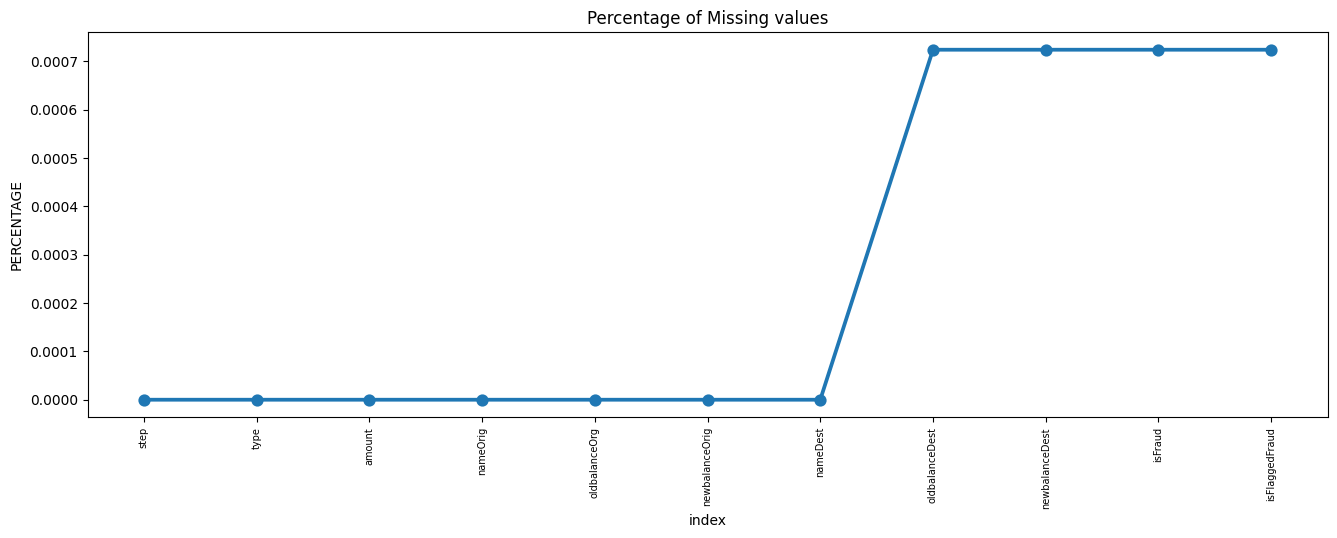

In [66]:
#Handling missing data
import seaborn as sns
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [67]:
df=df.drop(columns=['isFlaggedFraud','step'])

In [68]:
df = df.dropna(subset=df.columns.difference(['type']))

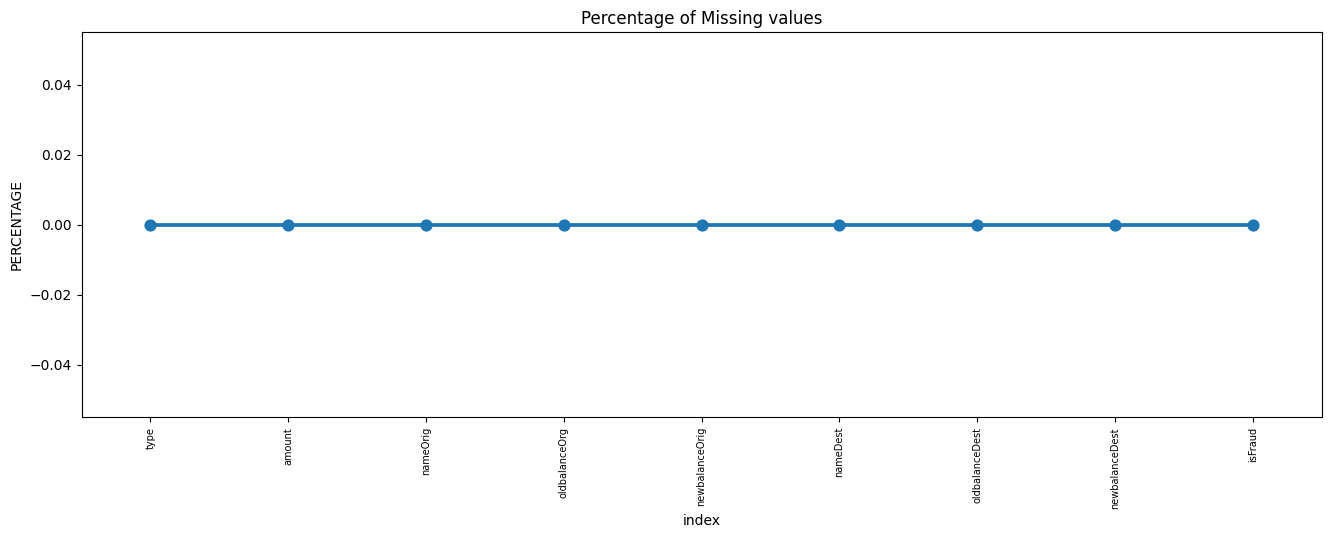

In [69]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Text(0.5, 1.02, 'Count of TARGET Variable per category')

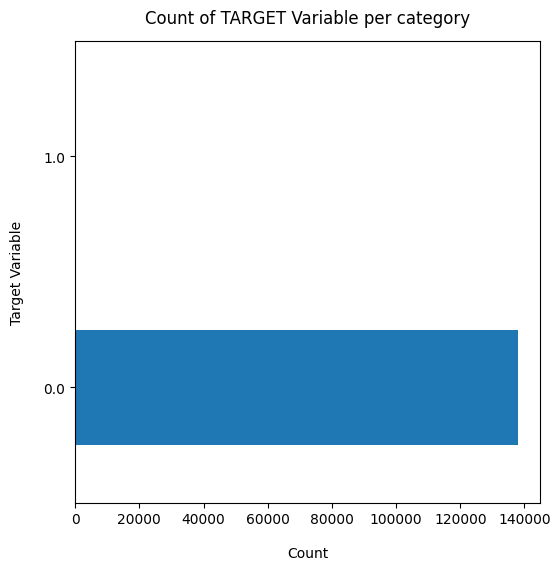

In [70]:
#Target variable
import matplotlib.pyplot as plt
df['isFraud'].value_counts().plot(kind='barh', figsize=(6, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [71]:
100*df['isFraud'].value_counts()/len(df['isFraud'])

,count
isFraud,
0.0,99.911668
1.0,0.088332


In [72]:
#Random down sampling

from sklearn.utils import resample

# Separate the majority (non-fraud) and minority (fraud) classes
df_majority = df[df['isFraud'] == 0]
df_minority = df[df['isFraud'] == 1]

# Downsample the majority class to match the size of the minority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # No replacement
                                   n_samples=len(df_minority),  # Match minority class
                                   random_state=42)

# Combine the downsampled majority class with the minority class
df_new = pd.concat([df_majority_downsampled, df_minority])

In [73]:
df_new['isFraud'].value_counts()

,count
isFraud,
0.0,122
1.0,122


In [74]:
df.duplicated().sum()

np.int64(0)

Univariate Analysis

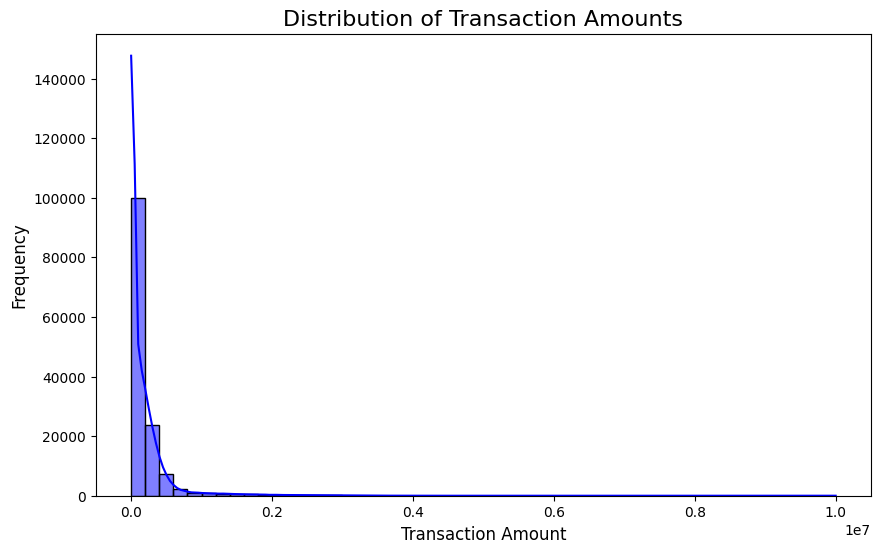

In [75]:
#finding the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [76]:
#log transformation
df['log_amount'] = np.log1p(df['amount'])

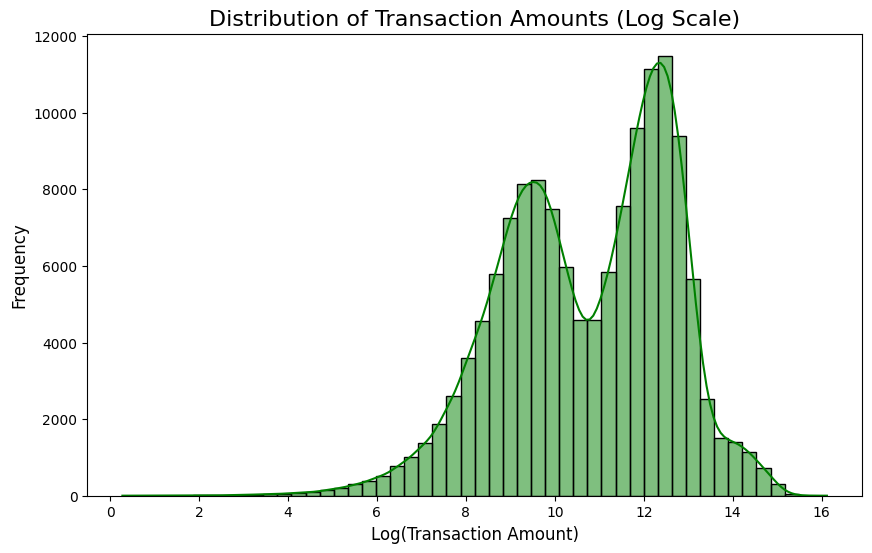

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Amounts (Log Scale)', fontsize=16)
plt.xlabel('Log(Transaction Amount)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Outlier detection

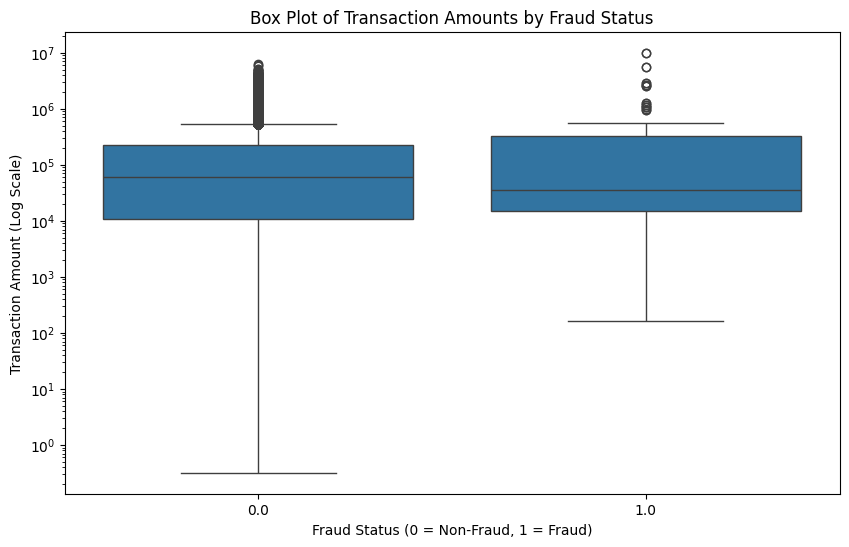

In [78]:
# Create a box plot to detect outliers based on fraud status
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='amount', data=df, showfliers=True)
plt.yscale('log')  # Apply log scale to better visualize high transaction amounts
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount (Log Scale)')
plt.show()

Fraudulent transactions tend to have higher transaction amounts than non-fraudulent transactions.The distribution of transaction amounts for non-fraud transactions is more concentrated around the median than the distribution of transaction amounts for fraud transactions.

Correlation Analysis

In [79]:
correlation = df[['amount', 'isFraud']].corr()

print("Correlation between Transaction Amount and Fraud Status:")
print(correlation)

Correlation between Transaction Amount and Fraud Status:
           amount   isFraud
amount   1.000000  0.033093
isFraud  0.033093  1.000000


Moderate correlation between amount and frauduelnt transaction

In [80]:
# Summary statistics for fraudulent and non-fraudulent transactions
fraud_stats = df[df['isFraud'] == 1]['amount'].describe()
non_fraud_stats = df[df['isFraud'] == 0]['amount'].describe()

print("Summary Statistics for Fraudulent Transactions:")
print(fraud_stats)

print("\nSummary Statistics for Non-Fraudulent Transactions:")
print(non_fraud_stats)


Summary Statistics for Fraudulent Transactions:
count    1.220000e+02
mean     5.587803e+05
std      1.524187e+06
min      1.640000e+02
25%      1.494984e+04
50%      3.506363e+04
75%      3.325220e+05
max      1.000000e+07
Name: amount, dtype: float64

Summary Statistics for Non-Fraudulent Transactions:
count    1.379930e+05
mean     1.780911e+05
std      3.387207e+05
min      3.200000e-01
25%      1.088720e+04
50%      6.008974e+04
75%      2.210361e+05
max      6.419835e+06
Name: amount, dtype: float64


Fraudulent transactions are generally characterized by larger transaction amounts compared to non-fraudulent transactions.

/tmp/ipython-input-81-3874918745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')
/tmp/ipython-input-81-3874918745.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')


Text(0, 0.5, 'Number of transactions')

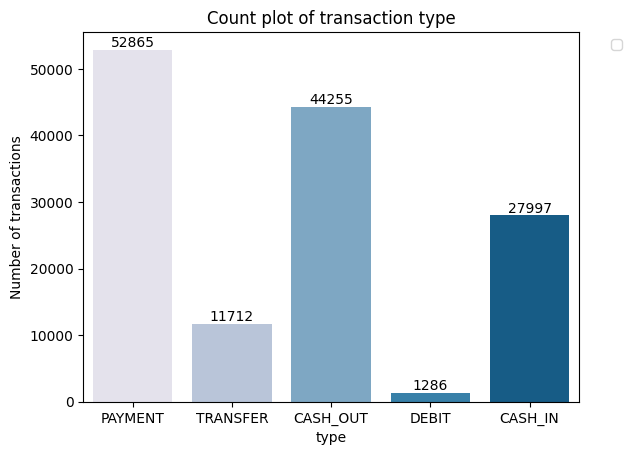

In [81]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

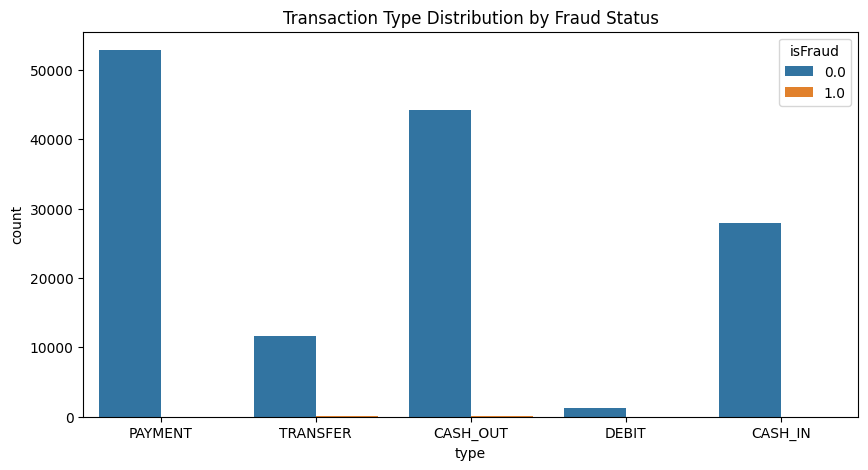

In [82]:
transaction_counts = df['type'].value_counts()

# Fraud count for each type
fraud_by_type = df[df['isFraud'] == 1]['type'].value_counts()

# Plotting the distributions
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type Distribution by Fraud Status')
plt.show()

The graph suggests that fraudulent transactions are more likely to be of type TRANSFER or CASH_OUT than other transaction types.

In [83]:
total_transactions_by_type = df['type'].value_counts()

# Fraudulent transactions per type
fraud_transactions_by_type = df[df['isFraud'] == 1]['type'].value_counts()

# Fraud rate calculation (fraudulent transactions / total transactions)
fraud_rate_by_type = fraud_transactions_by_type / total_transactions_by_type

# Convert to percentage
fraud_rate_by_type = fraud_rate_by_type * 100

# Display fraud rate for each type
print(fraud_rate_by_type)

type
CASH_IN          NaN
CASH_OUT    0.140097
DEBIT            NaN
PAYMENT          NaN
TRANSFER    0.512295
Name: count, dtype: float64


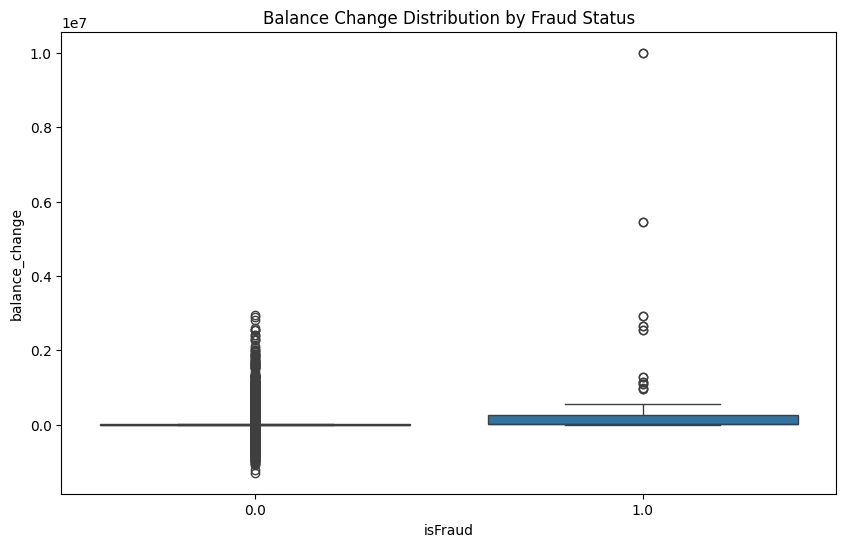

In [84]:
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Check for fraudulent transactions with significant balance change
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='balance_change', data=df)
plt.title('Balance Change Distribution by Fraud Status')
plt.show()

The analysis indicates a strong correlation between larger balance changes and fraudulent transactions.

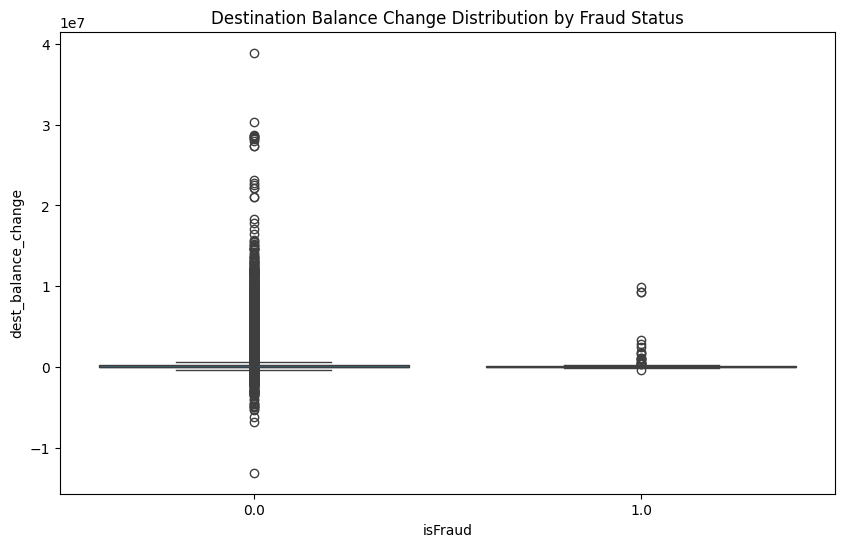

In [85]:
# Create a new column for destination balance change
df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']

# Check for fraudulent transactions with significant destination balance change
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='dest_balance_change', data=df)
plt.title('Destination Balance Change Distribution by Fraud Status')
plt.show()

The presence of numerous outliers in the fraudulent group suggests that these transactions often include very high value transfers, which can be a strong indicator of fraud.
The analysis suggests a strong correlation between higher destination balance changes and fraudulent transactions.

In [86]:
fraud_rate_by_dest = df.groupby('nameDest')['isFraud'].mean()

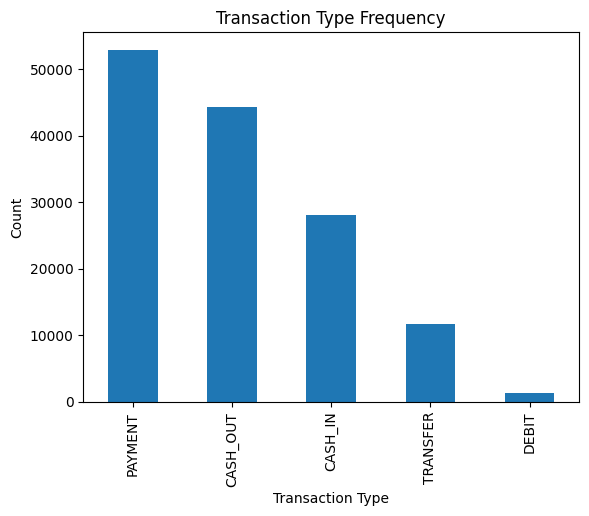

In [87]:
transaction_type_counts = df['type'].value_counts()
transaction_type_counts.plot(kind='bar')
plt.title('Transaction Type Frequency')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [88]:
# Group by 'type' and 'isFraud', then calculate the mean and count
grouped = df.groupby(['type', 'isFraud']).agg({'amount': ['mean', 'count']}).reset_index()
print(grouped)

       type isFraud         amount       
                              mean  count
0   CASH_IN     0.0  176977.939762  27997
1  CASH_OUT     0.0  199704.297360  44193
2  CASH_OUT     1.0  541187.715806     62
3     DEBIT     0.0    4439.332574   1286
4   PAYMENT     0.0   11429.209033  52865
5  TRANSFER     0.0  874101.732629  11652
6  TRANSFER     1.0  576959.373000     60


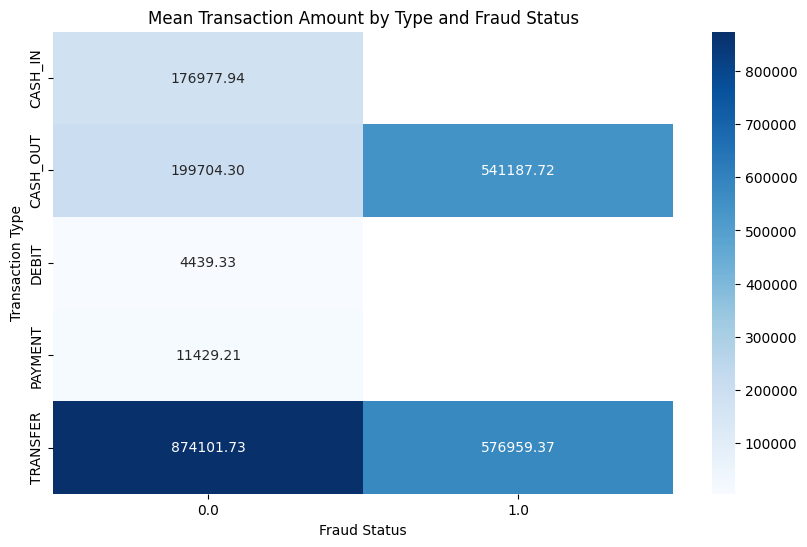

In [89]:
pivot_table = df.pivot_table(values='amount', index='type', columns='isFraud', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f')
plt.title('Mean Transaction Amount by Type and Fraud Status')
plt.ylabel('Transaction Type')
plt.xlabel('Fraud Status')
plt.show()

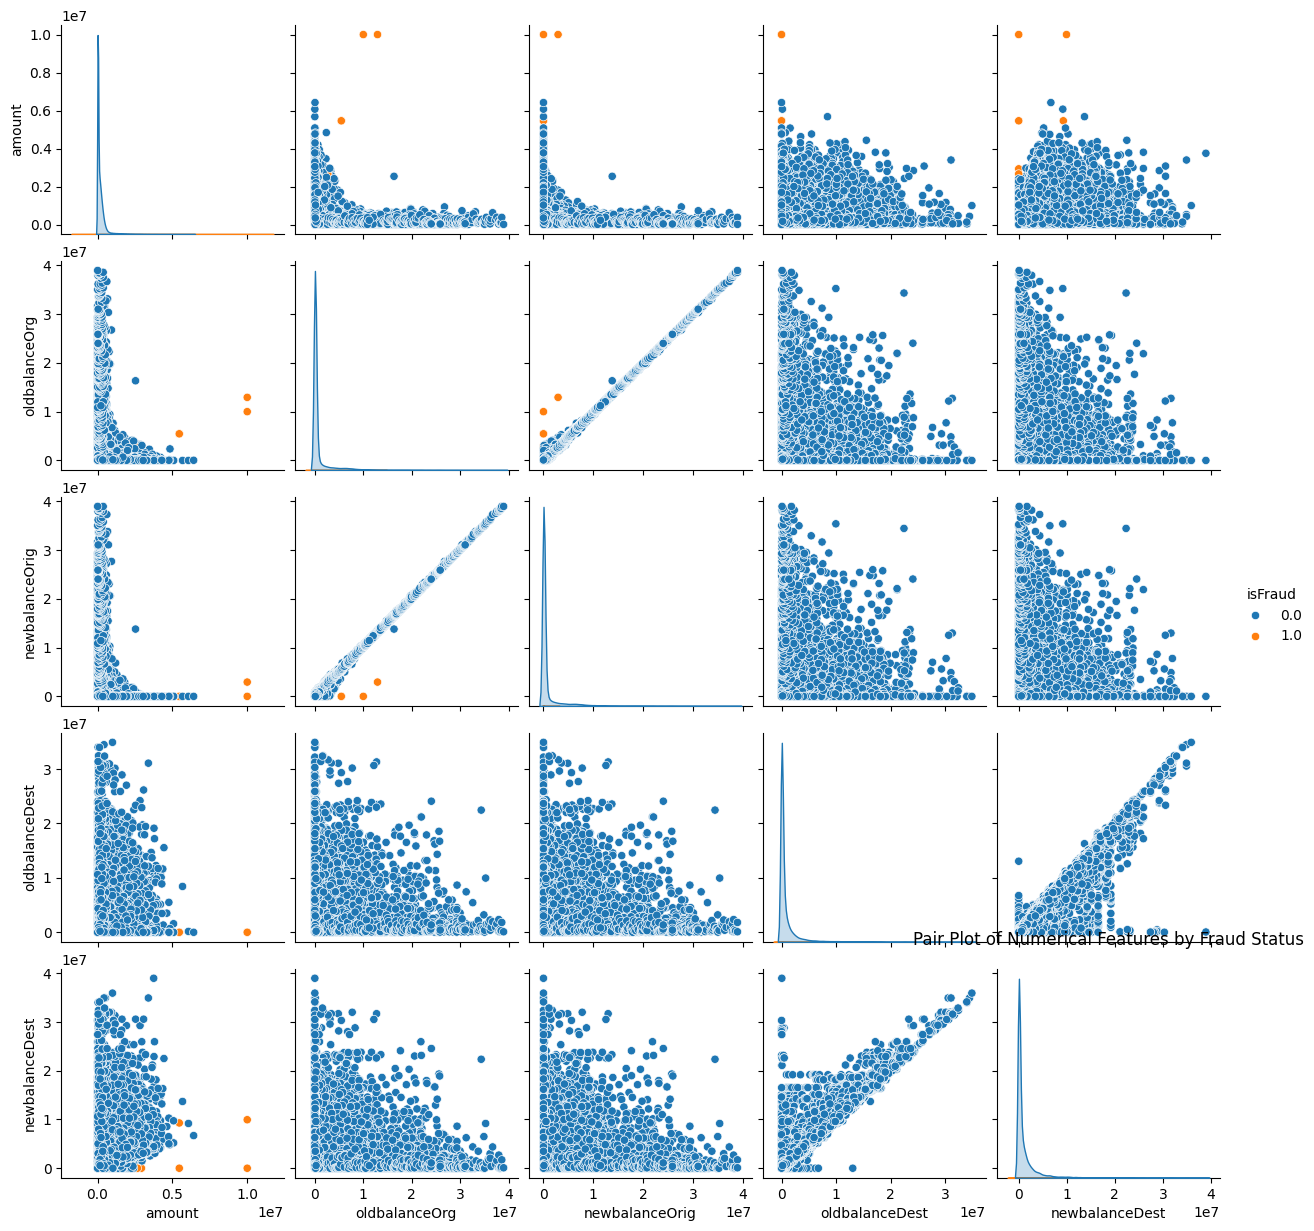

In [90]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
sns.pairplot(df[numerical_cols + ['isFraud']], hue='isFraud')
plt.title('Pair Plot of Numerical Features by Fraud Status')
plt.show()

Fraudulent Transactions Involve Larger Amounts.
Specific Transaction Types are More Susceptible to Fraud: The analysis of transaction types indicated that "TRANSFER" and "CASH_OUT" were more commonly associated with fraudulent activities.
High Balance Changes are Indicative of Fraud.
the "amount," "newbalanceOrig," and "newbalanceDest" were found to be influential in predicting fraudulent transactions.

In [91]:
df = df.drop(['nameOrig','nameDest'], axis=1)

In [92]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_type = encoder.fit_transform(df[['type']])

In [93]:
encoded_type_df = pd.DataFrame(encoded_type,
                               columns=encoder.get_feature_names_out(['type']),
                               index=df.index)

# Dropping the original 'type' column and adding the encoded columns
data_encoded = pd.concat([df.drop('type', axis=1), encoded_type_df], axis=1)

# Display the first few rows to verify the result
print(data_encoded.head())


     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0   9839.64       170136.0       160296.36             0.0             0.0   
1   1864.28        21249.0        19384.72             0.0             0.0   
2    181.00          181.0            0.00             0.0             0.0   
3    181.00          181.0            0.00         21182.0             0.0   
4  11668.14        41554.0        29885.86             0.0             0.0   

   isFraud  log_amount  balance_change  dest_balance_change  type_CASH_OUT  \
0      0.0    9.194276         9839.64                  0.0            0.0   
1      0.0    7.531166         1864.28                  0.0            0.0   
2      1.0    5.204007          181.00                  0.0            0.0   
3      1.0    5.204007          181.00             -21182.0            1.0   
4      0.0    9.364703        11668.14                  0.0            0.0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0         0.0    

In [94]:
X = data_encoded.drop('isFraud', axis=1)  # Features (all columns except the target)
y = data_encoded['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data (SVM and KNN need scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
#Decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41399
         1.0       0.46      0.58      0.51        36

    accuracy                           1.00     41435
   macro avg       0.73      0.79      0.76     41435
weighted avg       1.00      1.00      1.00     41435

Decision Tree Accuracy:  0.999034632557017


In [96]:
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"Decision Tree ROC-AUC: {dt_roc_auc}")
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

Decision Tree ROC-AUC: 0.7913647270062885
Confusion Matrix:
 [[41374    25]
 [   15    21]]


In [97]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41399
         1.0       0.71      0.14      0.23        36

    accuracy                           1.00     41435
   macro avg       0.86      0.57      0.62     41435
weighted avg       1.00      1.00      1.00     41435

Logistic Regression Accuracy:  0.999203571859539


In [98]:
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
print(f"Logistic Regression ROC-AUC: {lr_roc_auc}")
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression ROC-AUC: 0.9380808983577167
Confusion Matrix:
 [[41397     2]
 [   31     5]]


In [99]:
svm_model = SVC(kernel='linear', probability=True)  # You can change the kernel type
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41399
         1.0       0.00      0.00      0.00        36

    accuracy                           1.00     41435
   macro avg       0.50      0.50      0.50     41435
weighted avg       1.00      1.00      1.00     41435

SVM Accuracy:  0.9991311693013153


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
print(f"SVM ROC-AUC: {svm_roc_auc}")
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

SVM ROC-AUC: 0.9530248986153718
Confusion Matrix:
 [[41399     0]
 [   36     0]]


In [101]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41399
         1.0       0.80      0.11      0.20        36

    accuracy                           1.00     41435
   macro avg       0.90      0.56      0.60     41435
weighted avg       1.00      1.00      1.00     41435

KNN Accuracy:  0.999203571859539


In [102]:
knn_roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
print(f"KNN ROC-AUC: {knn_roc_auc}")
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

KNN ROC-AUC: 0.8183983912654895
Confusion Matrix:
 [[41398     1]
 [   32     4]]


In [103]:
import pickle
with open('Fraud_detection_dtree.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

In [104]:
load_model=pickle.load(open('Fraud_detection_dtree.pkl', 'rb'))

In [105]:
model_score=load_model.score(X_test, y_test)
model_score

0.999034632557017